In [1]:
import openaq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from aqtools import aqutils as u
api = openaq.OpenAQ()

In [6]:
# co
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='co',
                                date_from='2021-08-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=8000)
r = resp['results']
df_co = pd.DataFrame(data=r)
co_local_dates = []
for date in df_co['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    co_local_dates.append(d)
df_co['date'] = co_local_dates
df_co = df_co.rename(columns={"value": "co"})
df_co = df_co.loc[:,['date','co']]
df_co = df_co.iloc[::-1]
df_co.head(3)
df_co

,date,co
5203,2021-08-03 11:00:00,0.28
5202,2021-08-03 12:00:00,0.30
5201,2021-08-03 13:00:00,0.30
5200,2021-08-03 14:00:00,0.30
5199,2021-08-03 15:00:00,0.32
...,...,...
4,2022-04-30 13:00:00,0.25
3,2022-04-30 14:00:00,0.25
2,2022-04-30 15:00:00,0.24
1,2022-04-30 16:00:00,0.23


In [8]:
# no2
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='no2',
                                date_from='2021-08-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=6000)
r = resp['results']
df_no2 = pd.DataFrame(data=r)
no2_local_dates = []
for date in df_no2['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    no2_local_dates.append(d)
df_no2['date'] = no2_local_dates
df_no2 = df_no2.rename(columns={"value": "no2"})
df_no2 = df_no2.loc[:,['date','no2']]
df_no2 = df_no2.iloc[::-1]

df_no2.head(3)

,date,no2
5202,2021-08-03 11:00:00,0.008
5201,2021-08-03 12:00:00,0.008
5200,2021-08-03 13:00:00,0.007


In [9]:
# o3
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='o3',
                                date_from='2021-08-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=6000)
r = resp['results']
df_o3 = pd.DataFrame(data=r)
o3_local_dates = []
for date in df_o3['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    o3_local_dates.append(d)
df_o3['date'] = o3_local_dates
df_o3 = df_o3.rename(columns={"value": "o3"})
df_o3 = df_o3.loc[:,['date','o3']]
df_o3 = df_o3.iloc[::-1]

df_o3.head(3)

,date,o3
5196,2021-08-03 11:00:00,0.024
5195,2021-08-03 12:00:00,0.024
5194,2021-08-03 13:00:00,0.024


In [ ]:
# pm25
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='pm25',
                                date_from='2021-08-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=6000)
r = resp['results']
df_pm25 = pd.DataFrame(data=r)
pm25_local_dates = []
for date in df_pm25['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    pm25_local_dates.append(d)
df_pm25['date'] = pm25_local_dates
df_pm25 = df_pm25.rename(columns={"value": "pm25"})
df_pm25 = df_pm25.loc[:,['date','pm25']]
df_pm25 = df_pm25.iloc[::-1]

df_pm25.head(3)

,date,pm25
5423,2021-08-03 11:00:00,4
5422,2021-08-03 12:00:00,4
5421,2021-08-03 13:00:00,3


In [ ]:
co_set = set(co_local_dates)
no2_set = set(no2_local_dates)
o3_set = set(o3_local_dates)
pm25_set = set(pm25_local_dates)

temp_set = co_set.intersection(no2_set)
temp_set = temp_set.intersection(o3_set)
temp_set = temp_set.intersection(pm25_set)

In [ ]:
df = df_co.merge(df_no2, how='inner', on='date')
df = df.merge(df_o3, how='inner', on='date')
df = df.merge(df_pm25, how='inner', on='date')
df = df.set_index(['date'])
df

,co,no2,o3,pm25
date,,,,
2021-08-03 11:00:00,0.28,0.008,0.024,4
2021-08-03 12:00:00,0.30,0.008,0.024,4
2021-08-03 13:00:00,0.30,0.007,0.024,3
2021-08-03 14:00:00,0.30,0.008,0.024,6
2021-08-03 15:00:00,0.32,0.009,0.023,5
...,...,...,...,...
2022-04-30 13:00:00,0.25,0.003,0.029,8
2022-04-30 14:00:00,0.25,0.002,0.029,4
2022-04-30 15:00:00,0.24,0.002,0.029,4


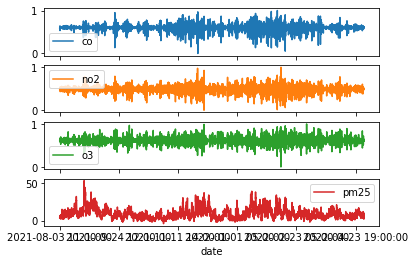

In [25]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
co_scaled = scaler.fit_transform(df['co'].values.reshape(-1, 1))
df['co'] = co_scaled


scaler = MinMaxScaler()
co_scaled = scaler.fit_transform(df['no2'].values.reshape(-1, 1))
df['no2'] = co_scaled

scaler = MinMaxScaler()
co_scaled = scaler.fit_transform(df['o3'].values.reshape(-1, 1))
df['o3'] = co_scaled

df.plot(subplots=True)
plt.show()


/tmp/ipykernel_1308/4240535939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['co'] = co_diff
/tmp/ipykernel_1308/4240535939.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no2'] = no2_diff
/tmp/ipykernel_1308/4240535939.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

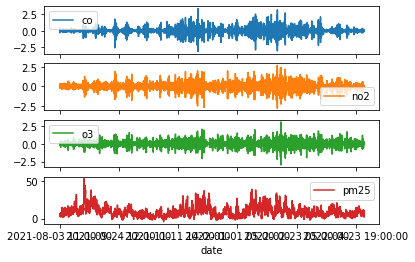

In [29]:
# Make data stationary
co_diff = u.differencing(df['co'].values)
no2_diff = u.differencing(df['no2'].values)
o3_diff = u.differencing(df['o3'].values)
# Delete the first row
df = df.iloc[:-1, :]

df['co'] = co_diff
df['no2'] = no2_diff
df['o3'] = o3_diff
df.plot(subplots=True)
plt.show()

In [33]:
# feature vectors
feature_np = df.to_numpy()[:, :3]
# label
label_np = df.to_numpy()[:, -1]
X = []
y = []
for i in range(8, len(feature_np)):
    X.append(feature_np[i-8:i, :])
    y.append(label_np[i])

X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
X.shape, y.shape

((5134, 8, 3), (5134,))

In [34]:
df.corr()

,co,no2,o3,pm25
co,1.000000,0.631796,-0.584650,-0.002533
no2,0.631796,1.000000,-0.839361,0.001499
o3,-0.584650,-0.839361,1.000000,0.000113
pm25,-0.002533,0.001499,0.000113,1.000000


In [47]:
TEST_SIZE = 500

X_train = X[:-TEST_SIZE]
y_train = y[:-TEST_SIZE]
X_test = X[-TEST_SIZE:]
y_test = y[-TEST_SIZE:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4634, 8, 3), (4634,), (500, 8, 3), (500,))

In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(GRU(units = 50, 
              return_sequences = True, 
              input_shape = (X_train[0].shape), 
              activation = 'tanh'))
model.add(GRU(units = 50, activation = 'tanh'))
model.add(Dense(units = 2))

# Compiling the RNN 
model.compile(optimizer = SGD(lr = 0.01, decay = 1e-7, 
                              momentum = 0.9, nesterov = False), 
                loss = 'mean_squared_error')

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_37 (GRU)                (None, 8, 50)             8250      
                                                                 
 gru_38 (GRU)                (None, 50)                15300     
                                                                 
 dense_17 (Dense)            (None, 2)                 102       
                                                                 
Total params: 23,652
Trainable params: 23,652
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Fitting to the trainig set 
model.fit(X_train, y_train, epochs = 100, batch_size = 150, verbose = 1)


Epoch 1/100
31/31 [==============================] - 5s 19ms/step - loss: 55.4036
Epoch 2/100
31/31 [==============================] - 1s 18ms/step - loss: 44.2970
Epoch 3/100
31/31 [==============================] - 1s 18ms/step - loss: 44.2897
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 44.0116
Epoch 5/100
31/31 [==============================] - 1s 18ms/step - loss: 44.2252
Epoch 6/100
31/31 [==============================] - 1s 18ms/step - loss: 43.9817
Epoch 7/100
31/31 [==============================] - 1s 18ms/step - loss: 43.8588
Epoch 8/100
31/31 [==============================] - 1s 18ms/step - loss: 43.9135
Epoch 9/100
31/31 [==============================] - 1s 18ms/step - loss: 44.0436
Epoch 10/100
31/31 [==============================] - 1s 18ms/step - loss: 43.8835
Epoch 11/100
31/31 [==============================] - 1s 17ms/step - loss: 44.2417
Epoch 12/100
31/31 [==============================] - 1s 19ms/step - loss: 44.0539
Epoch 13/100


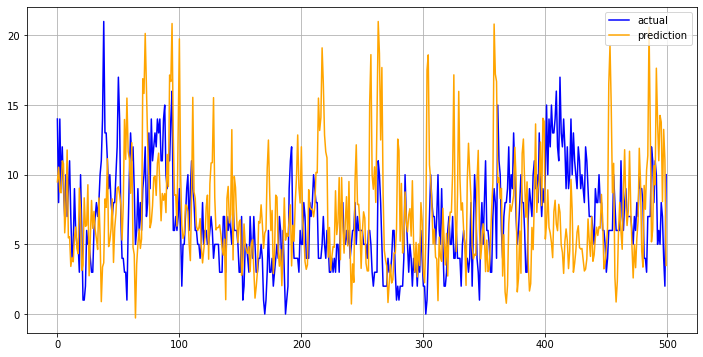

In [89]:
pred = model.predict(X_test)
pred = [p.mean() for p in pred]
plt.figure(figsize=(12,6))
plt.plot(y_test, label='actual', color='blue')
plt.plot(pred, label='prediction', color='orange')
plt.grid()
plt.legend(loc='best')
plt.show()